<a href="https://colab.research.google.com/github/longpt233/sales-optimization/blob/main/modeling_bia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About dataset:
The data used in this project is from an anonymous organisation’s social media ad campaign. The data fileconversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.( Dữ liệu được sử dụng trong dự án này là từ chiến dịch quảng cáo trên mạng xã hội của một tổ chức ẩn danh. Tệp dữ liệu convert_data.csv chứa 1143 quan sát trong 11 biến. Dưới đây là mô tả của các biến.)

1.) ad_id: an unique ID for each ad. (id duy nhất của mỗi quảng cáo)

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.(ID liên kết với từng chiến dịch quảng cáo của công ty XYZ )

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.(ID được liên kết với cách Facebook theo dõi từng chiến dịch.)

4.) age: age of the person to whom the ad is shown.( tuổi của người mà quảng cáo được hiển thị.)

5.) gender: gender of the person to whim the ad is shown (giới tính của người mà quảng cáo được hiển thị)

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile). ( một mã xác định danh mục mà sở thích của người đó thuộc về -sở thích được đề cập trong hồ sơ công khai trên Facebook của người đó)

7.) Impressions: the number of times the ad was shown.( số lần quảng cáo được hiển thị.)

8.) Clicks: number of clicks on for that ad. (số lần nhấp vào quảng cáo đó)

9.) Spent: Amount paid by company xyz to Facebook, to show that ad. ( Số tiền công ty xyz trả cho Facebook, để hiển thị quảng cáo đó.)

10.) Total conversion: Total number of people who enquired about the product 
after seeing the ad. ( Tổng số người đã hỏi về sản phẩm sau khi xem quảng cáo)

11.) Approved conversion: Total number of people who bought the product after seeing the ad. ( Tổng số người đã mua sản phẩm sau khi xem quảng cáo.)

# Clone data, import Library and load data:

In [64]:
!git clone "https://github.com/anh-nnd183475/data_sales_conversion.git"

fatal: destination path 'data_sales_conversion' already exists and is not an empty directory.


In [65]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
rawdataset = pd.read_csv("../content/data_sales_conversion/KAG_conversion_data.csv")

# Data exploration

In [66]:
rawdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [67]:
rawdataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [68]:
rawdataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


## Some data manipulation
### we would drop all three id_features because they do not affect the conclusion

In [69]:
dataset = rawdataset.drop(['ad_id','xyz_campaign_id','fb_campaign_id'],axis=1)
categorical_features=[ x for x in dataset.columns if dataset[x].dtype == 'O']
conversion_features= ['Total_Conversion','Approved_Conversion']
print("The categorical features:")
categorical_features

The categorical features:


['age', 'gender']

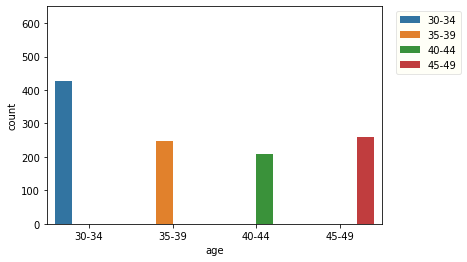

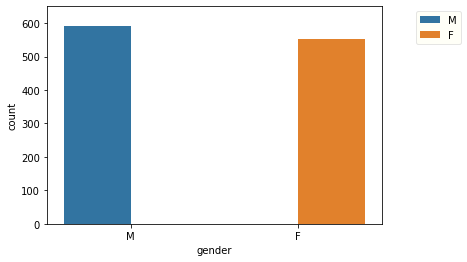

In [70]:
for i in categorical_features:
    sns.countplot(dataset[i], hue= dataset[i])
    plt.ylim(0,650)
    plt.legend(loc='upper right', facecolor='ivory', framealpha=0.5, bbox_to_anchor=(1.25,1))
    plt.show()

In [71]:
dataset['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [72]:
dataset['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

In [74]:
numerical_features = [x for x in dataset.columns if x not in categorical_features]
print("The numerical features: ")
numerical_features

The numerical features: 


['interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

In [75]:
numerical_features_with_nan = [x for x in numerical_features if dataset[x].isnull().sum()>0]
if len(numerical_features_with_nan) ==0:
  print("- The dataset does not have NULL value")

- The dataset does not have NULL value


In [76]:
dataset['Approved_Conversion'].value_counts()

0     559
1     403
2      86
3      35
4      24
5       7
6       7
8       5
10      4
7       4
9       3
14      2
17      1
21      1
12      1
13      1
Name: Approved_Conversion, dtype: int64

# Data Visualization

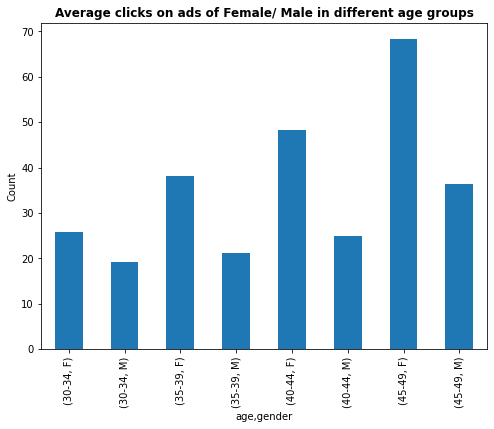

In [77]:
fig= plt.figure(figsize=(8,6))

dataset.groupby(categorical_features)['Clicks'].mean().plot.bar()
plt.title('Average clicks on ads of Female/ Male in different age groups', fontweight="bold")
plt.ylabel('Count')

plt.show()

- From the chart above, we can see that women of all ages click on more ads than men did in the same age group

<Figure size 1500x1200 with 0 Axes>

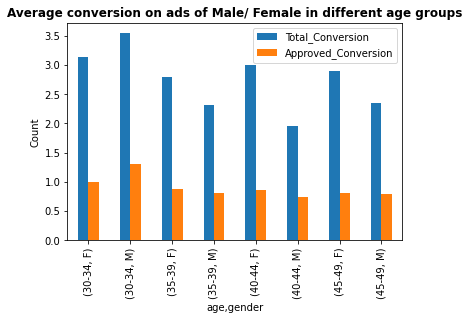

In [78]:
fig= plt.figure(figsize=(10,8),dpi=150)

dataset.groupby(categorical_features)['Total_Conversion','Approved_Conversion'].mean().plot.bar()
plt.title('Average conversion on ads of Male/ Female in different age groups', fontweight="bold")
plt.ylabel('Count')

plt.show()

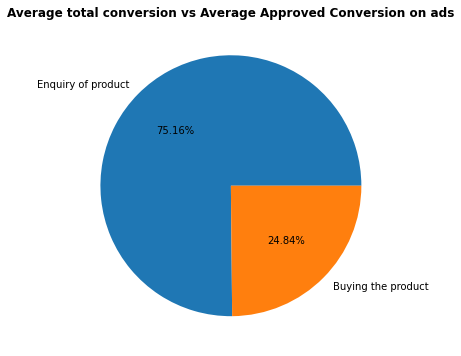

In [79]:
fig= plt.figure(figsize=(6,6))

value=[dataset['Total_Conversion'].mean(), dataset['Approved_Conversion'].mean()]
labels= ['Enquiry of product', 'Buying the product']
plt.pie(value, labels = labels, autopct='%.2f%%')
plt.title('Average total conversion vs Average Approved Conversion on ads', fontweight="bold")
plt.show()

- On average, the number of people who buy a product after seeing an ad is only 1/3 of the number of people asking about it after seeing an ad

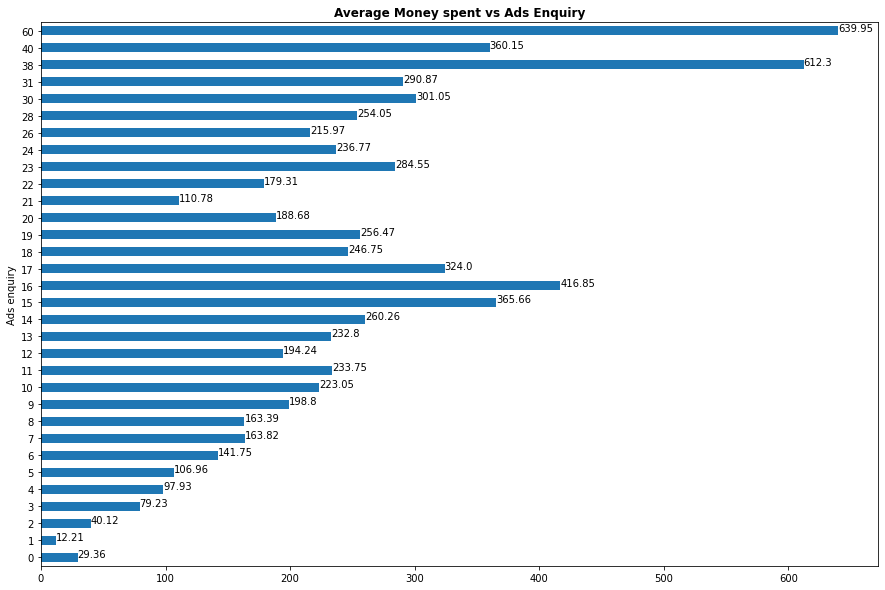

In [80]:
fig= plt.figure(figsize=(15,10))

dataset.groupby('Total_Conversion')['Spent'].mean().plot.barh()
plt.title('Average Money spent vs Ads Enquiry', fontweight="bold")
plt.ylabel('Ads enquiry')

abc= round(dataset.groupby('Total_Conversion')['Spent'].mean(),2)
sum1 = 0
sum2 = 0
sum3 = 0
for index, value in enumerate(abc):
  if value < 200 :
    sum1+= index
  if value >= 400:
    sum2+= index
  if value < 400 and value>= 200:
    sum3+= index
  plt.text(value, index, str(value))

In [81]:
print('We can see that when the xyz company spent:')
print(' - $10-200 on Ads, then, they got '+ str(sum1) +' Ads enquiry in return.')
print(' - $200-400 on Ads, then, they got '+ str(sum3) +' Ads enquiry in return.')
print(' - More than $400 on Ads, then, they got '+ str(sum2) +' Ads enquiry in return.') 

We can see that when the xyz company spent:
 - $10-200 on Ads, then, they got 120 Ads enquiry in return.
 - $200-400 on Ads, then, they got 300 Ads enquiry in return.
 - More than $400 on Ads, then, they got 76 Ads enquiry in return.


- So We can conclude that spending between $200-400 on Ads seems reasonable for any company as it gives the maximum Ads enquiry.

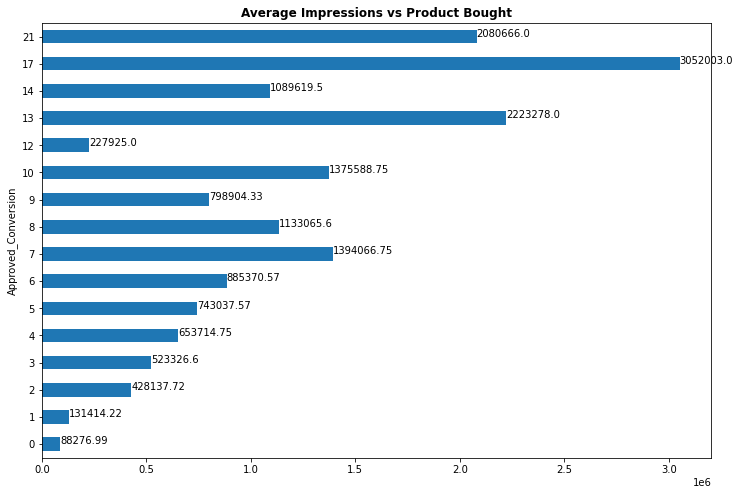

In [82]:
from pandas.core.indexes.base import Index
fig= plt.figure(figsize=(12,8))

dataset.groupby(['Approved_Conversion'])['Impressions'].mean().plot.barh()
xyz=round(dataset.groupby(['Approved_Conversion'])['Impressions'].mean(),2)
plt.title('Average Impressions vs Product Bought', fontweight="bold")
id1 = 0
id2 = 0
#to put the value above the bar
for index, value in enumerate(xyz):
  plt.text(value, index, str(value))

**Insights:**

When the ads were shown more than 1.000.000 times, a total of 90 products were bought by the people, and

42 products were sold when the Impressions were less than 1.000.000

i.e. More impression implies more publicity and thus more people will buy it.

### Separating data in 2 parts(men and women)

In [83]:
women= dataset[dataset['gender']=='F']
men= dataset[dataset['gender']=='M']

men_abv_avg_Impression = men[men['Impressions']>dataset['Impressions'].mean()]
women_abv_avg_Impression = women[women['Impressions']>dataset['Impressions'].mean()]

men_below_avg_Impression = men[men['Impressions']<dataset['Impressions'].mean()]
women_below_avg_Impression = women[women['Impressions']<dataset['Impressions'].mean()]

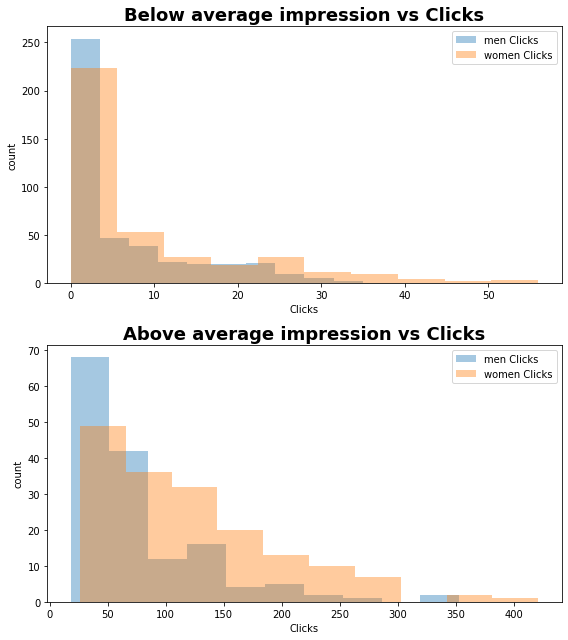

In [84]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,9))

sns.distplot(men_below_avg_Impression.Clicks, bins=10, kde= False, label= 'men Clicks', ax= ax1)
sns.distplot(women_below_avg_Impression.Clicks, bins=10, kde= False, label= 'women Clicks', ax= ax1)
ax1.set_ylabel('count')
ax1.set_title('Below average impression vs Clicks', fontweight="bold", size=18)
ax1.legend()

sns.distplot(men_abv_avg_Impression.Clicks, bins=10, kde= False, label= 'men Clicks', ax= ax2)
sns.distplot(women_abv_avg_Impression.Clicks, bins=10, kde= False, label= 'women Clicks', ax= ax2)
ax2.legend()
ax2.set_ylabel('count')
ax2.set_title('Above average impression vs Clicks', fontweight="bold", size=18)

plt.tight_layout()
plt.show()

- When women were shown ads more than the above average amount, they tend to click on it more often than men, who were shown the same amount of ads.

- When women were shown ads less than the above average amount, then number of clicks fell drastically for both men and women, but women still clicked more than men did.

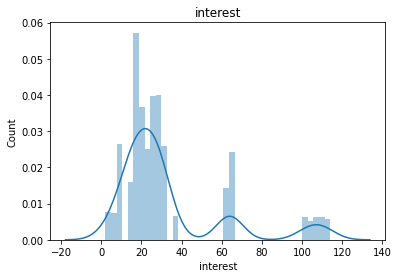

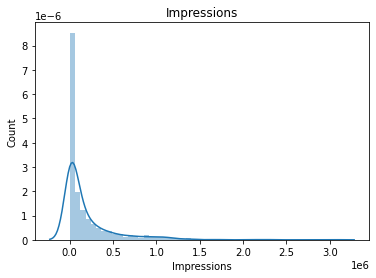

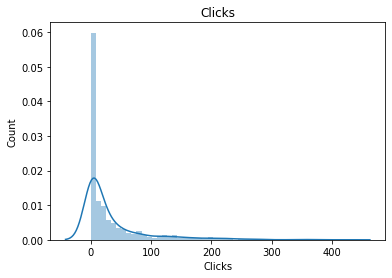

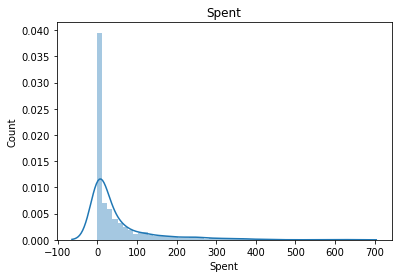

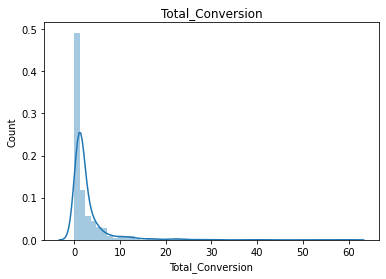

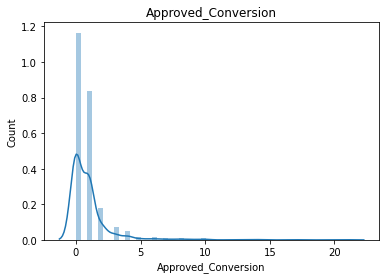

In [85]:
for i in numerical_features:
    sns.distplot(dataset[i])
    plt.title(i)
    plt.ylabel('Count')
    plt.show()

####Giving numerical value to the categorical values by using LabelEncoder


In [86]:
from sklearn.preprocessing import LabelEncoder
Le= LabelEncoder()

for x in categorical_features:
    dataset[x]= Le.fit_transform(dataset[x])
    print(x, Le.classes_)

age ['30-34' '35-39' '40-44' '45-49']
gender ['F' 'M']


#### Bringing down all the values (now all values are numerical) to same scale (between 0 to 1)

In [88]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
dataset_scaled = pd.DataFrame(scale.fit_transform(dataset) ,columns = dataset.columns)

###Finding the Correlation

Text(0.5, 1.0, 'The correlation heatmap between features:')

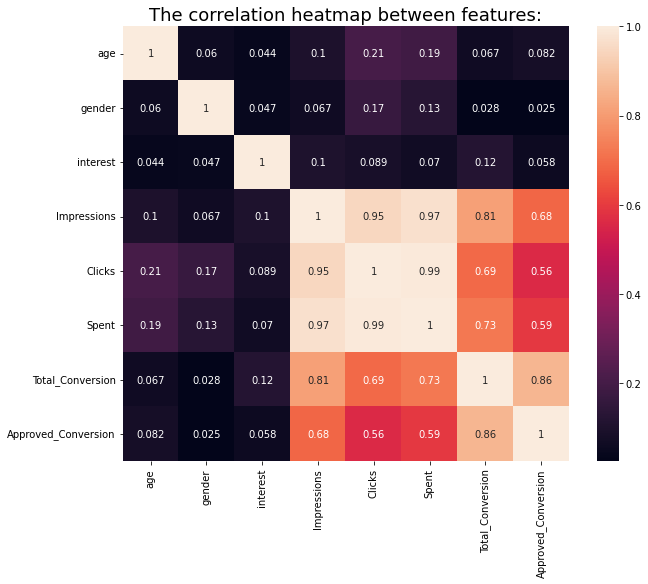

In [89]:
fig= plt.figure(figsize=(10,8))

sns.heatmap(dataset_scaled.corr().abs() , annot= True)
plt.title('The correlation heatmap between features:',fontsize= 18)

- So we keep only the related columns:

In [90]:
data= dataset_scaled.copy()
data= data[['Impressions', 'Clicks', 'Spent']]

# Applying algorithm (K-means)

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia= []
k= np.arange(1,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    ab = model.fit(data.values)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_
                             }))
inertias= pd.concat(inertia, axis=1).T.set_index('k')
inertias

,inertia
k,
1.0,3429.000000
2.0,996.484579
3.0,542.270022
4.0,352.434131
5.0,259.835776
6.0,187.273807
7.0,148.012639
8.0,126.322430


- So we can see that lesser the inertia better the result.

But the drop in inertia from k=1 to k=2 and k=2 to k=3 is much greater.

Though, inertia decreases with increase in k, but the rate is very low.

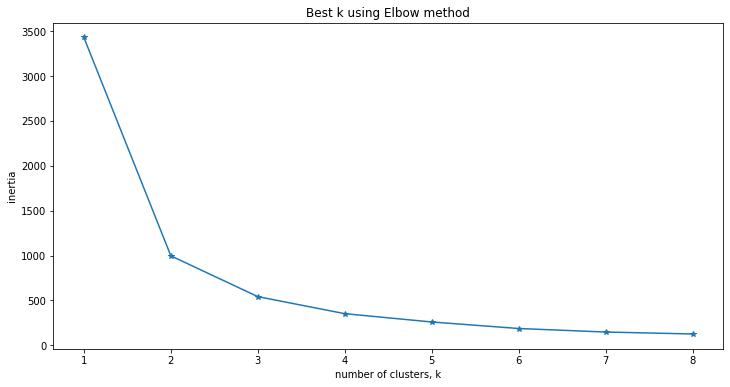

In [92]:
plt.figure(figsize=(12,6))
plt.plot(inertias.index, inertias['inertia'], '-*')
plt.title('Best k using Elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

- From the above elbow graph, we can see that for k=2, inertia drops with a high rate, so, we can choose k=2 or k=3

In [93]:
score=[]
k= np.arange(2,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    pred = model.fit_predict(data.values)
    sil_score= silhouette_score(data.values, pred)
    score.append(pd.Series({'k': i,
                            'Score': sil_score
                             }))
result= pd.concat(score, axis=1).T.set_index('k')
result

,Score
k,
2.0,0.792779
3.0,0.711813
4.0,0.689029
5.0,0.655137
6.0,0.654219
7.0,0.645691
8.0,0.619890


- from the above table shows that k = 2 gives the best results, so we choose it

In [95]:
model = KMeans(n_clusters= 2, max_iter=5)
model.fit(data.values)
KMeans(max_iter=5, n_clusters=2)
data['Score']= model.predict(data.values)
data.sample(5)

,Impressions,Clicks,Spent,Score
965,0.266747,0.626188,0.512135,0
287,-0.521273,-0.516819,-0.521819,0
872,0.068993,-0.006862,0.036944,0
177,-0.506178,-0.411310,-0.483717,0
979,-0.336445,-0.217878,-0.249690,0


## Visualization of result:

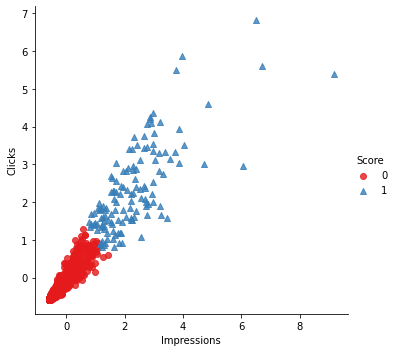

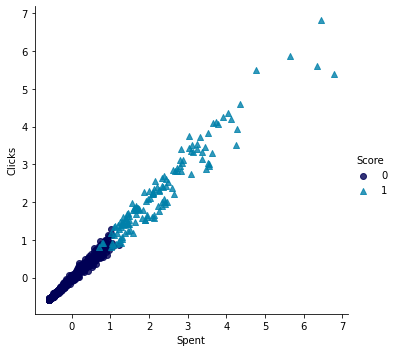

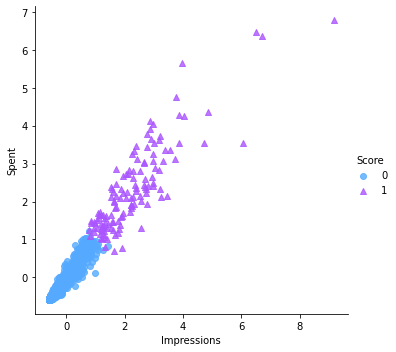

In [96]:
sns.lmplot(x='Impressions', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette='Set1')
sns.lmplot(x='Spent', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"], palette="ocean" )
sns.lmplot(x='Impressions', y='Spent', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette="cool" )
plt.show()